In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.pipeline import make_pipeline
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures

## Context

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

#### How can you help here?

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

#### Column Profiling:

- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

#### Concept Used:

- Exploratory Data Analysis
- Linear Regression

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')
#First 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
#Number of Rows and Columns
df.shape
#500 Rows and 9 Columns

(500, 9)

In [4]:
#Different Columns
df.columns.tolist()

['Serial No.',
 'GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [5]:
#Changing Column Name from "Chance of Admit " to "Chance of Admit" and "LOR " to "LOR"
df.rename(columns={'Chance of Admit ':'Chance of Admit',"LOR ":"LOR"},inplace=True)
df.head(3)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [6]:
#Checking for Null Values
df.isna().sum()
#There are no null values.

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [7]:
#Checking for duplicate rows
df[df.duplicated()]
#There are no duplicate rows

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit


#### Checking for number of Unique values for every column.

In [8]:
for value in df.columns:
    print(value,'=',df[value].nunique())

Serial No. = 500
GRE Score = 49
TOEFL Score = 29
University Rating = 5
SOP = 9
LOR = 9
CGPA = 184
Research = 2
Chance of Admit = 61


In [9]:
#We can drop "Serial No." column, as it is a unique row identifier.
df.drop(columns='Serial No.',inplace=True)
#Checking the updated DataFrame
df.head(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


## UNIVARIATE ANALYSIS

- ### GRE Score

In [11]:
#Number of Unique Values
df['GRE Score'].nunique()

49

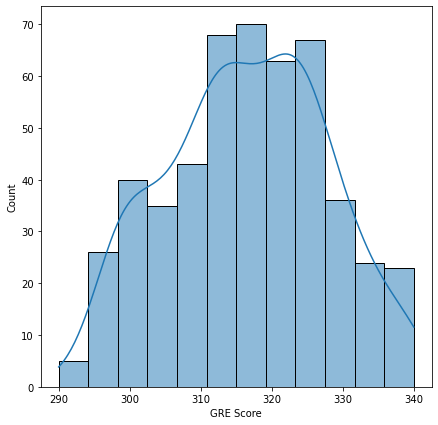

In [12]:
plt.figure(figsize=(7,7))
sns.histplot(data=df,x='GRE Score',kde=True)
plt.show()
#The distribution looks similar to a normal distribution.

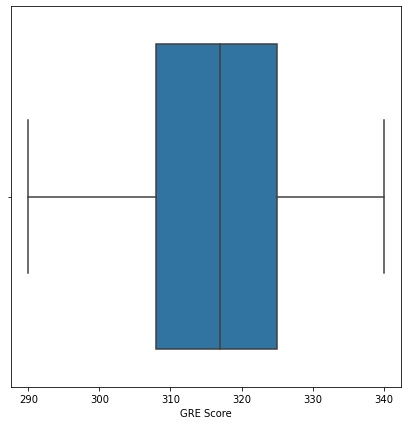

In [13]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='GRE Score')
plt.show()
#There are no outliers

- ### TOEFL Score

In [14]:
#Number of Unique Values
df['TOEFL Score'].nunique()

29

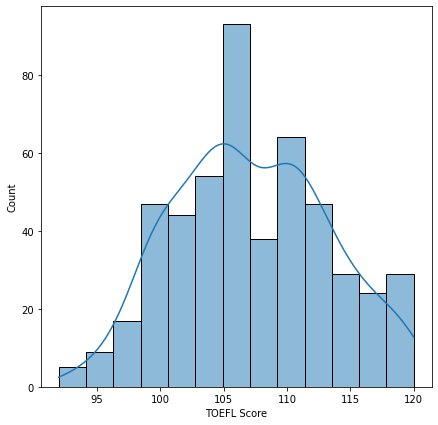

In [15]:
plt.figure(figsize=(7,7))
sns.histplot(data=df,x='TOEFL Score',kde=True)
plt.show()
#The distribution looks similar to a normal distribution.

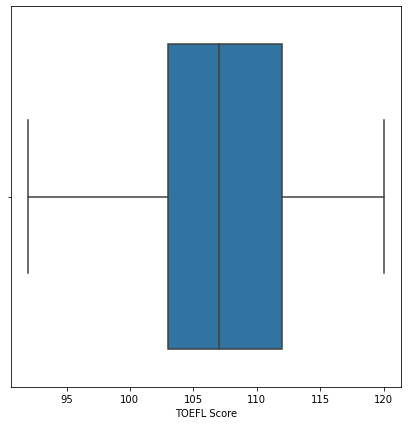

In [16]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='TOEFL Score')
plt.show()
#There are no outliers

### University Rating

In [17]:
#Number of Unique Values
df['University Rating'].nunique()

5

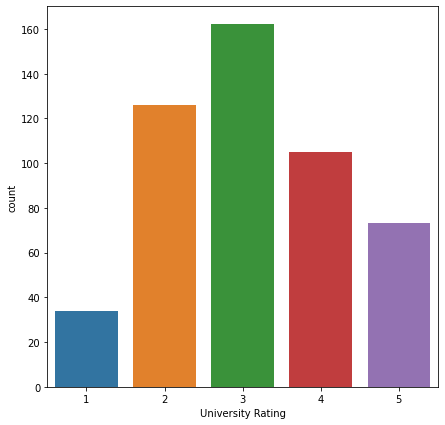

In [18]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='University Rating')
plt.show()
#University Rating 3 and 2 have the highest no. of occurences.

- ### SOP

In [19]:
#Number of Unique Values
df['SOP'].nunique()

9

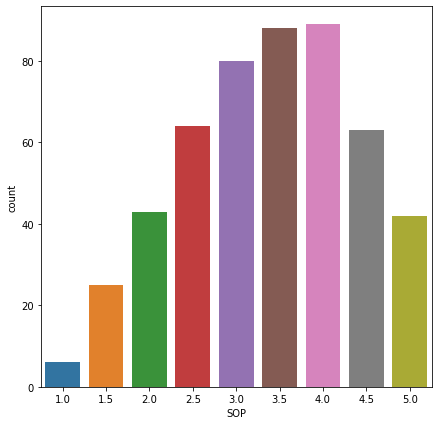

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='SOP')
plt.show()
#SOP 4,3.5,3 have the highest no. of occurences.

- ### LOR

In [21]:
#Number of Unique Values
df['LOR'].nunique()

9

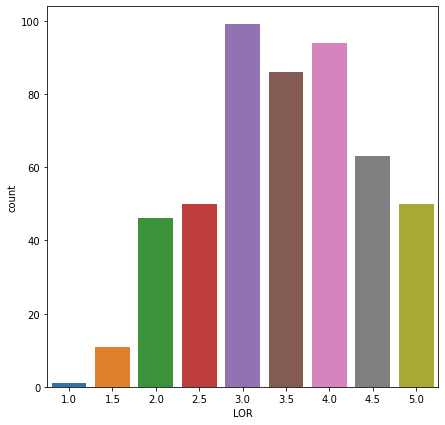

In [22]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='LOR')
plt.show()
#LOR 3,4,3.5 have the highest no. of occurences.

- ### CGPA

In [23]:
#Number of Unique Values
df['CGPA'].nunique()

184

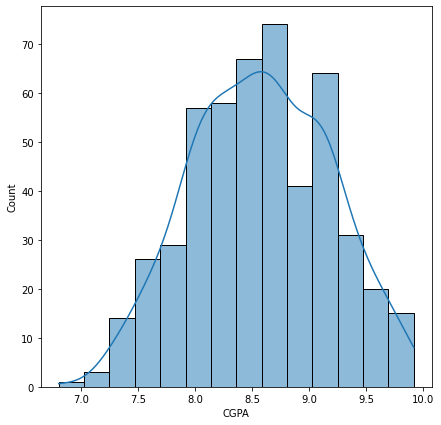

In [24]:
plt.figure(figsize=(7,7))
sns.histplot(data=df,x='CGPA',kde=True)
plt.show()
#The distribution looks similar to a normal distribution.

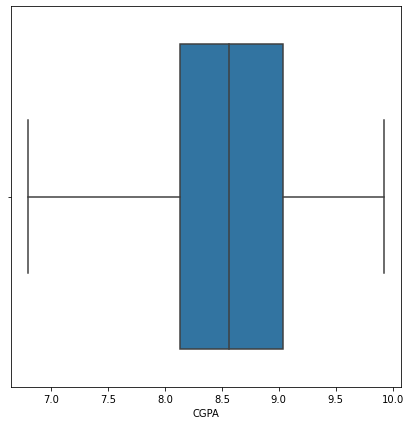

In [25]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='CGPA')
plt.show()
#There are no outliers

- ### Research

In [26]:
#Number of Unique Values
df['Research'].nunique()

2

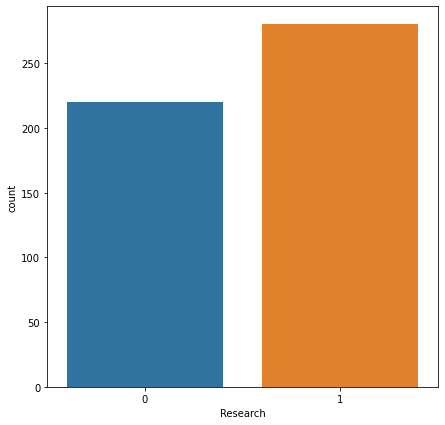

In [27]:
plt.figure(figsize=(7,7))
sns.countplot(data=df,x='Research')
plt.show()
#There are more people who have done research.

- ### Chance of Admit

In [28]:
#Number of Unique Values
df['Chance of Admit'].nunique()

61

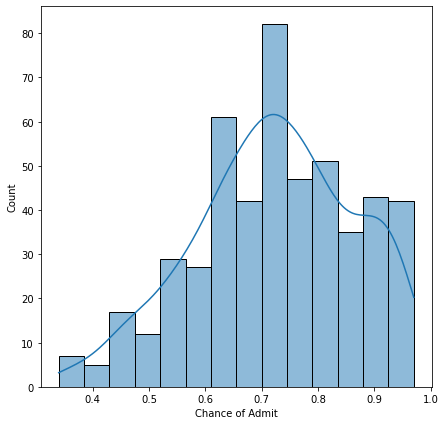

In [29]:
plt.figure(figsize=(7,7))
sns.histplot(data=df,x='Chance of Admit',kde=True)
plt.show()
#The distribution does not look similar to a normal distribution.

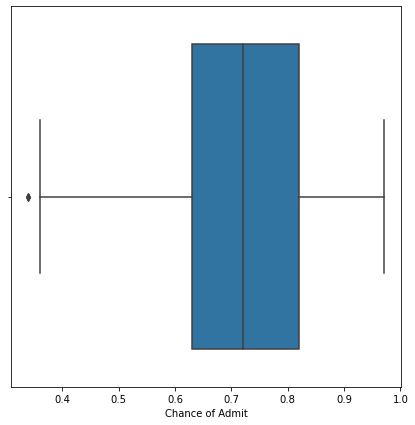

In [30]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='Chance of Admit')
plt.show()
#There is only 1 outlier.

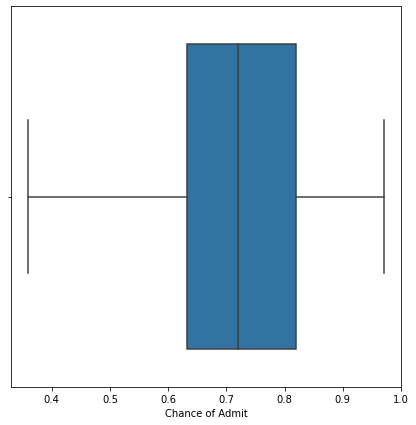

In [31]:
#Outlier Treatment for "Chance of Admit" variable.
#We can remove this outlier.
q25=np.quantile(df['Chance of Admit'],.25)
q75=np.quantile(df['Chance of Admit'],.75)
iqr=q75-q25
lower_whisker=q25-(1.5*iqr)
df=df[df['Chance of Admit']>lower_whisker]
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='Chance of Admit')
plt.show()

In [32]:
#Updated Dataset Shape
df.shape
#2 outliers were removed

(498, 8)

In [33]:
#Checking the descriptive measures
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,316.548193,107.232932,3.118474,3.374498,3.487952,8.579839,0.562249,0.723273
std,11.253378,6.059228,1.143620,0.991824,0.924654,0.603335,0.496609,0.139327
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.360000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.632500
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


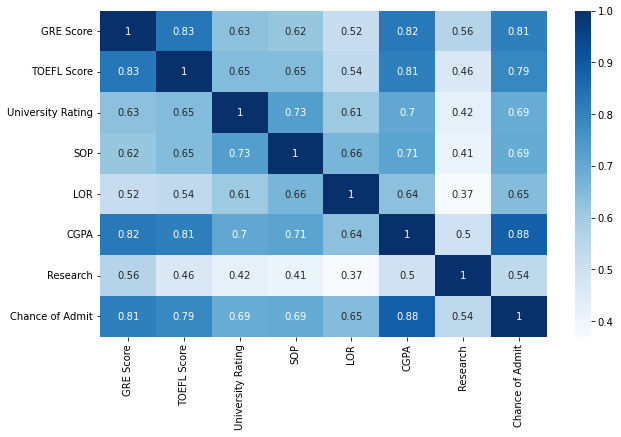

In [34]:
#Checking for correlation between various possible pairs of variables.
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

### Observations
There is very strong correlation between:
- "GRE Score" and "TOEFL Score"
- "CGPA" and "TOEFL Score"
- "GRE Score" and "CGPA"
- "Chance of Admit" and "TOEFL Score"
- "GRE Score" and "Chance of Admit"
- "CGPA" and "Chance of Admit"

## BIVARIATE ANALYSIS

- ### Chance of Admit vs GRE Score

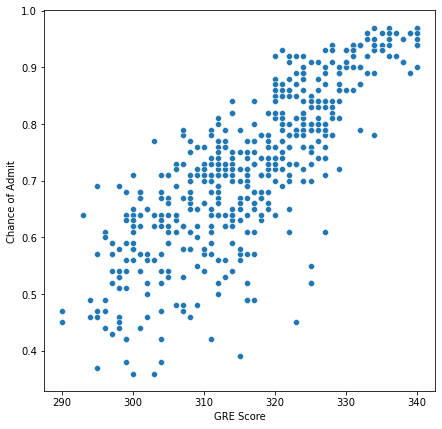

In [35]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x='GRE Score',y='Chance of Admit')
plt.show()
#There seems to be a positive relationship.

- ### Chance of Admit vs TOEFL Score

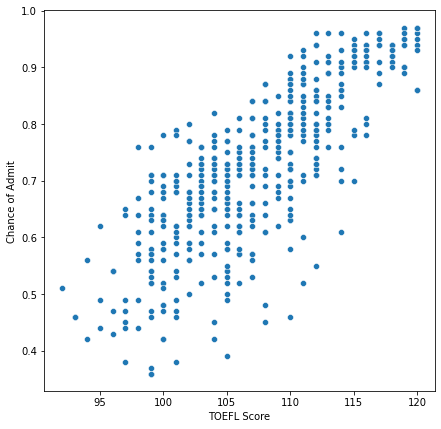

In [36]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x='TOEFL Score',y='Chance of Admit')
plt.show()
#There seems to be a positive relationship.

- ### Chance of Admit vs University Rating

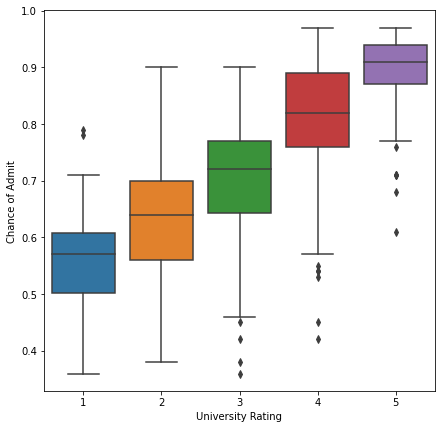

In [37]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='University Rating',y='Chance of Admit')
plt.show()
#People having higher university ratings have higher median chance of admit.

- ### Chance of Admit vs SOP

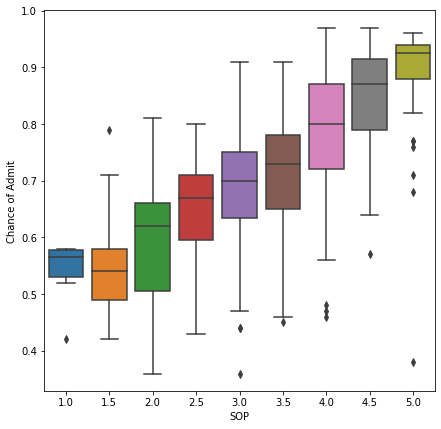

In [38]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='SOP',y='Chance of Admit')
plt.show()
#People having higher SOP have higher median chance of admit.

- ### Chance of Admit vs LOR

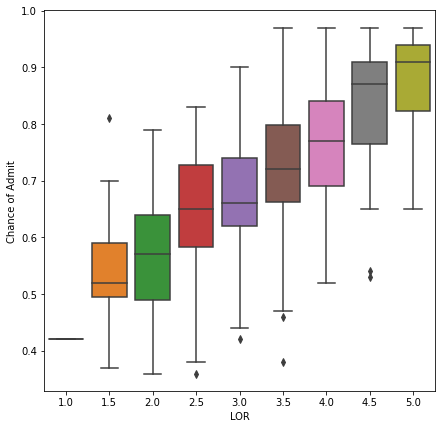

In [39]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='LOR',y='Chance of Admit')
plt.show()
#People having higher LOR have higher median chance of admit.

- ### Chance of Admit vs CGPA

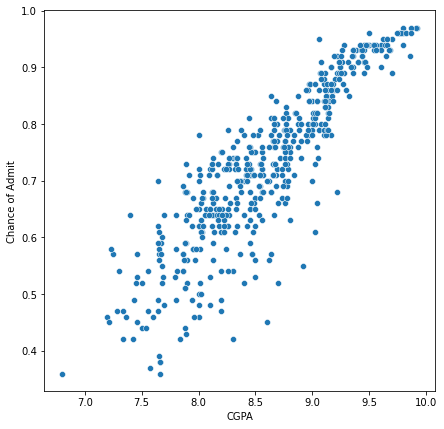

In [40]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x='CGPA',y='Chance of Admit')
plt.show()
#There seems to be a positive relationship.

- ### Chance of Admit vs Research

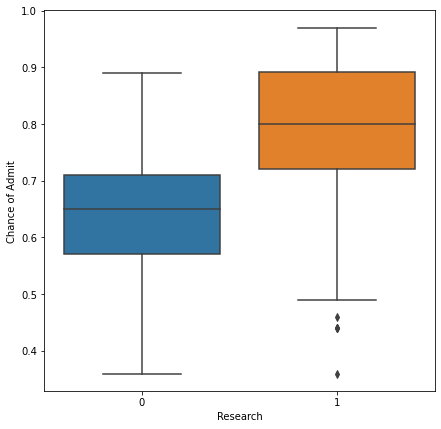

In [41]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='Research',y='Chance of Admit')
plt.show()
#People who have done research have a higher median chance of admit.

### Pair-Plot between pairs of independent variables

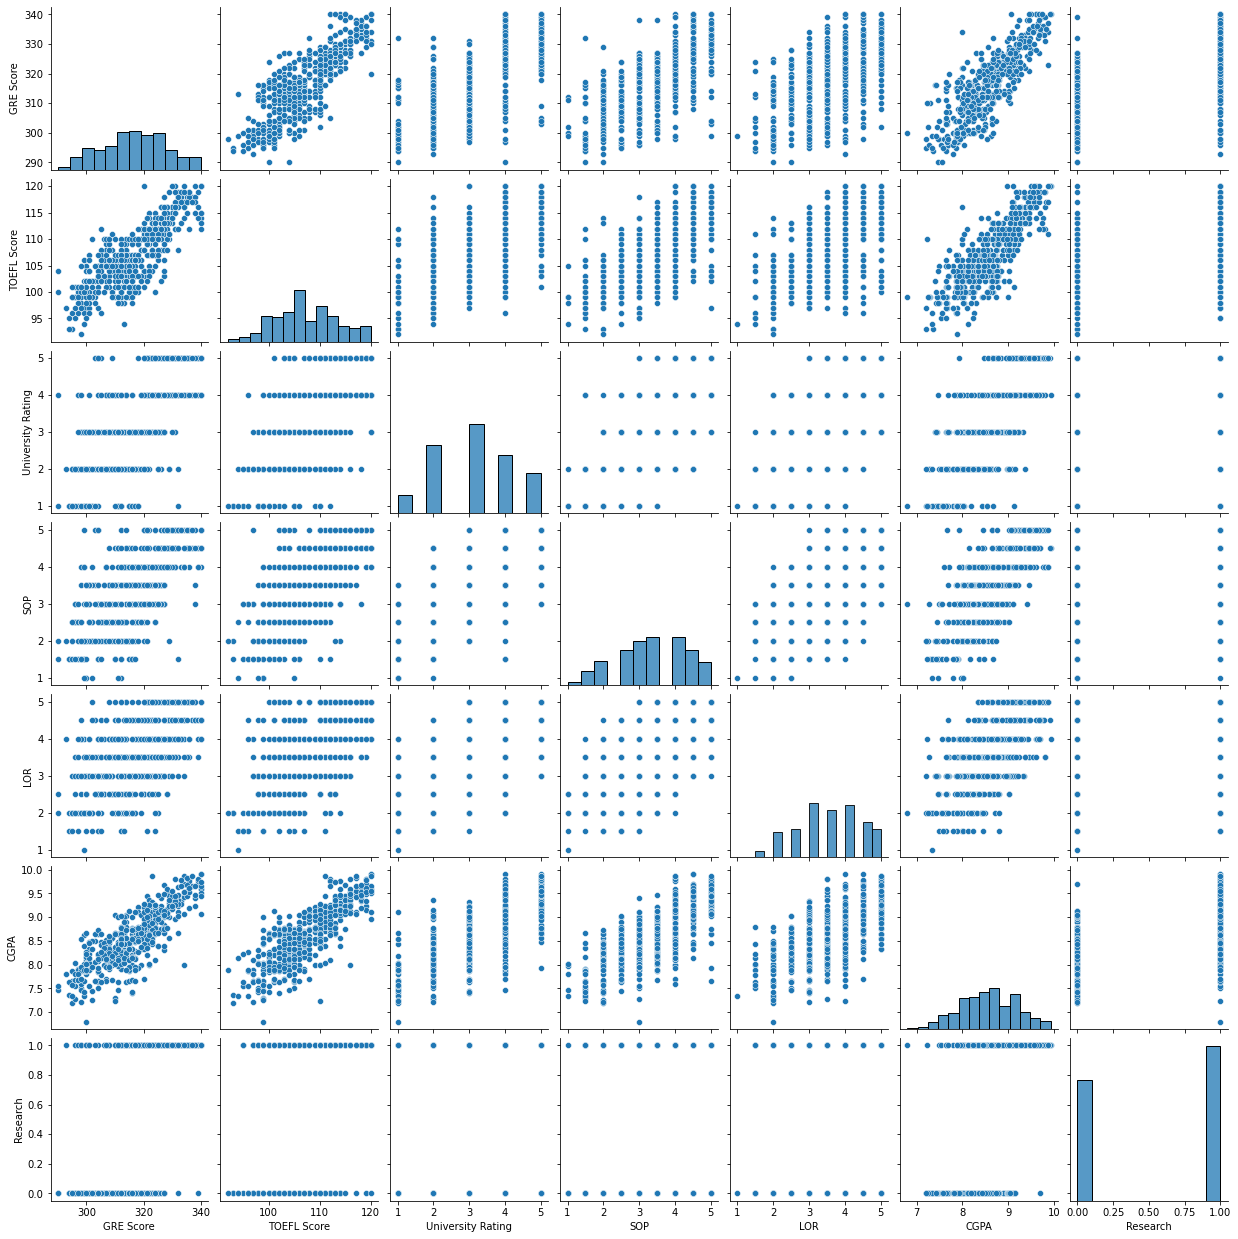

In [42]:
sns.pairplot(df.iloc[:,:-1])
plt.show()

### Observations
We have the same obervations from the pariplot as from the Correlation Coefficient.
There is very strong correlation between:
- "GRE Score" and "TOEFL Score"
- "CGPA" and "TOEFL Score"
- "GRE Score" and "CGPA"

In [43]:
#Splitting the dataset into X and y.
X=df.iloc[:,:-1]
display(X.head())
y=df.iloc[:,-1]
display(y.head())

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

### We will try 3 different models and compare which one gives the best performance and finally select that model.

## 1) Linear Regression without Regularization

#### Checking Assumption-1 : Multicollinearity check by VIF score

In [44]:
#Splitting into Train and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 7)
(100, 7)


In [46]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.001892,0.002922,0.004863,0.004369,0.018484,0.115601,0.021924,-1.288234


In [48]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8252701604118984
0.8162154474443224


#R square is good. But can be better.

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,GRE Score,1309.62
1,TOEFL Score,1215.27
5,CGPA,949.15
3,SOP,35.54
4,LOR,30.92
2,University Rating,21.00
6,Research,2.88


In [50]:
#Lets remove the "GRE Score" variable since it has the highest VIF score.
X_train.drop(columns='GRE Score',inplace=True)
X_test.drop(columns='GRE Score',inplace=True)

In [51]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 6)
(100, 6)


In [52]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [53]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.004554,0.005914,0.002987,0.017442,0.129298,0.029314,-0.981256


In [54]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8200275993029533
0.8138400528146292


In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TOEFL Score,1309.62
1,University Rating,1215.27
5,Research,949.15
3,LOR,35.54
4,CGPA,30.92
2,SOP,21.00


In [56]:
#Lets remove the "TOEFL Score" variable since it has the highest VIF score.
X_train.drop(columns='TOEFL Score',inplace=True)
X_test.drop(columns='TOEFL Score',inplace=True)

In [57]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 5)
(100, 5)


In [58]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [59]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,University Rating,SOP,LOR,CGPA,Research,intercept
0,0.007416,0.006367,0.017241,0.158417,0.033636,-0.760462


In [60]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8066241977645116
0.8189603044540663


In [61]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,University Rating,1309.62
1,SOP,1215.27
3,CGPA,35.54
4,Research,30.92
2,LOR,21.00


In [62]:
#Lets first remove the "University Rating" variable since it has the highest VIF score.
X_train.drop(columns='University Rating',inplace=True)
X_test.drop(columns='University Rating',inplace=True)

In [63]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 4)
(100, 4)


In [64]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [65]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,SOP,LOR,CGPA,Research,intercept
0,0.00992,0.018396,0.162313,0.035068,-0.787588


In [66]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.80513097994306
0.8157198077244471


In [67]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,SOP,1309.62
1,LOR,1215.27
3,Research,35.54
2,CGPA,21.00


In [68]:
#Lets first remove the "SOP" variable since it has the highest VIF score.
X_train.drop(columns='SOP',inplace=True)
X_test.drop(columns='SOP',inplace=True)

In [69]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 3)
(100, 3)


In [70]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [71]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,LOR,CGPA,Research,intercept
0,0.021959,0.169973,0.035916,-0.832748


In [72]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8029230132754355
0.814834553731494


In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,LOR,1309.62
1,CGPA,1215.27
2,Research,21.00


In [74]:
#Lets first remove the "LOR" variable since it has the highest VIF score.
X_train.drop(columns='LOR',inplace=True)
X_test.drop(columns='LOR',inplace=True)

In [75]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 2)
(100, 2)


In [76]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,CGPA,Research,intercept
0,0.190978,0.037811,-0.937678


In [78]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7902034821610344
0.8173819376498599


In [79]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,CGPA,1309.62
1,Research,1215.27


In [80]:
#Lets first remove the "CGPA" variable since it has the highest VIF score.
X_train.drop(columns='CGPA',inplace=True)
X_test.drop(columns='CGPA',inplace=True)

In [81]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 1)
(100, 1)


In [82]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(model.feature_names_in_)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,Research,intercept
0,0.155353,0.634913


In [84]:
#Details of the model.
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.30379585070109627
0.2568948508579596


In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Research,1309.62


### Observation:
We observed that as we kept removing features, the model score kept on decreasing. So instead we can rely on statistical tests to select the important features.

In [86]:
import statsmodels.api as sm

In [87]:
#Splitting into Train and Test Data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_test.shape)

(398, 7)
(100, 7)


In [88]:
X_train_sm=sm.add_constant(X_train)
X_train_sm.head(3)

C:\Users\kiit\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
438,1.0,318,110,1,2.5,3.5,8.54,1
274,1.0,315,100,1,2.0,2.5,7.95,0
58,1.0,300,99,1,3.0,2.0,6.80,1


In [89]:
model=sm.OLS(y_train,X_train).fit()

In [90]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Chance of Admit   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              6630.
Date:                Sat, 13 Aug 2022   Prob (F-statistic):                        0.00
Time:                        23:55:38   Log-Likelihood:                          509.39
No. Observations:                 398   AIC:                                     -1005.
Df Residuals:                     391   BIC:                                     -976.9
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score            -0.0030      0.000     -7.705      0.000      -0.004      -0.002
TOEFL Score           0.0038      0.001      3.485      0.001       0.002       0.006
University Rating     0.0147      0.005      3.196      0.002       0.006       0.024
SOP                   0.0094      0.006      1.662      0.097      -0.002       0.020
LOR                   0.0195      0.005      3.786      0.000       0.009       0.030
CGPA                  0.1273      0.012     10.602      0.000       0.104       0.151
Research              0.0565      0.008      7.318      0.000       0.041       0.072
==============================================================================
Omnibus:                       51.250   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.181
Skew:                          -0.855   Prob(JB):                     7.80e-17
Kurtosis:                       4.244   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- From the p-values we can observe that "SOP" feature is not significant. So we can remove it, and then proceed with building our model.

In [91]:
X_train.drop(columns="SOP",inplace=True)
X_test.drop(columns="SOP",inplace=True)

In [92]:
features=X_train.columns
features

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'LOR', 'CGPA',
       'Research'],
      dtype='object')

In [93]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:
print("Train Score",model.score(X_train,y_train))
print("Test Score",model.score(X_test,y_test))

Train Score 0.8249183132096353
Test Score 0.816345586231225


In [95]:
values=[list(model.coef_)+[model.intercept_]]
columns=list(features)+['intercept']
coefficients_df=pd.DataFrame(data=values,columns=columns)
coefficients_df

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,intercept
0,0.020654,0.01836,0.007198,0.018169,0.069751,0.010918,0.722739


#### From the coefficients, we can conclude that CGPA and GRE Score have the highest importance.

In [96]:
y_pred=model.predict(X_test)

In [97]:
#Train Score
model.score(X_train,y_train)

0.8249183132096353

In [98]:
#Test R2 Score
r2=model.score(X_test,y_test)
r2

0.816345586231225

In [99]:
#Adjusted test r2 score:
num=(1-r2)*(X_test.shape[0]-1)
den=X_test.shape[0] - X_test.shape[1] -1
print(1-(num/den))
#Adjusted r2 score is good

0.804496914375175


In [100]:
def rmse(y_pred, y_test):
    return sum((y_pred-y_test) ** 2)/X_test.shape[0]

In [101]:
def mae(y_pred, y_test):
    return sum(abs(y_pred-y_test))/X_test.shape[0]

In [102]:
#Root Mean Square Error
rmse(y_pred,y_test)
#RMSE error is pretty low

0.0034480822338025462

In [103]:
#Mean Absolute Error
mae(y_pred,y_test)
#MAE error is pretty low

0.04104574540762105

#There is scope for improvement of the model, if we use Polynomial Features maybe along with Regularization, which can negate both overfitting and multicollinearity effects.

#### Checking Assumption-2 : The mean of residuals is nearly zero

In [104]:
residuals=y_test-y_pred
print(np.mean(residuals))
#We see that the mean of residuals is almost 0.

0.0035551209418732007


#### Checking Assumption-3 : Linearity of variables

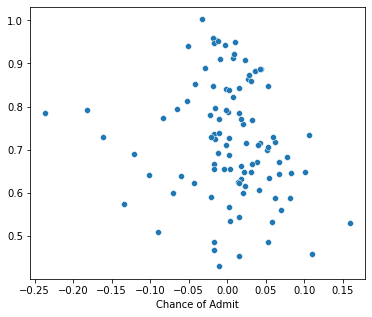

In [105]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=residuals,y=y_pred)
plt.show()
#There is no pattern.

#### Checking Assumption-4 : Test for Homoscedasticity (10 Points)

In [106]:
import statsmodels.stats.api as sms
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test)

In [107]:
test

(0.4604397316780448, 0.9942459565716549, 'increasing')

Since p-value is greater than 0.5, therefore there is homoscedasticity.

#### Checking Assumption-5 : Normality of residuals

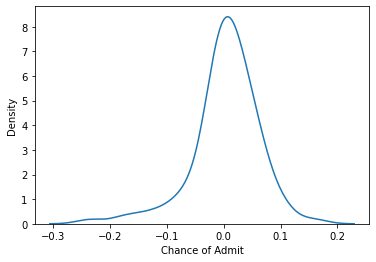

In [108]:
sns.kdeplot(residuals)
plt.show()
#It looks almost like a normal curve

C:\Users\kiit\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


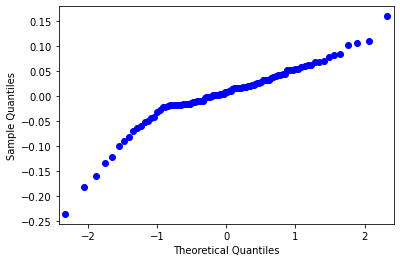

In [109]:
fig = sm.qqplot(residuals)
plt.show()
#It isnt a normal distribution.

## 2) Linear Regression using Ridge Regularization

For linear Regression using Regularization, the model weights will give appropriate weights to the features, and also take care of multicollinearity and weights assigned to the polynomial features.

In [110]:
#Splitting into Train,Val and Test Data
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [111]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(298, 7)
(100, 7)
(100, 7)


In [112]:
train_scores=[]
test_scores=[]

for value in range(1,51):
    model=make_pipeline(PolynomialFeatures(5),StandardScaler(),Ridge(alpha=value))
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_val,y_val))

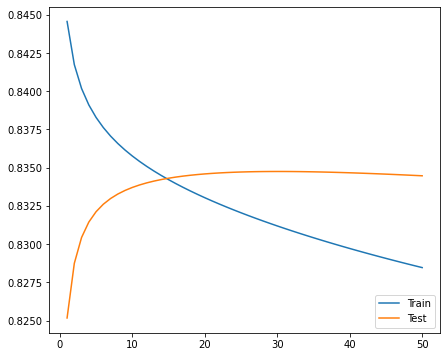

In [113]:
plt.figure(figsize=(7,6))
plt.plot(list(range(1,51)),train_scores,label='Train')
plt.plot(list(range(1,51)),test_scores,label='Test')
plt.legend(loc='lower right')
plt.show()

In [114]:
np.argmax(test_scores)

29

In [115]:
#For lambda = 30, we are getting the best test score.
model=make_pipeline(PolynomialFeatures(5),StandardScaler(),Ridge(alpha=30))
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_val,y_val))

0.8311866730455106
0.8347489168267126


#Observation : We get a better test score with Ridge Regularization than with normal Linear Regression.

## 3) Linear Regression using Lasso Regularization

For linear Regression using Regularization, the model weights will give appropriate weights to the features, and also take care of multicollinearity and weights assigned to the polynomial features.

In [116]:
#Splitting into Train,Val and Test Data
X_train_cv,X_test,y_train_cv,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_val,y_train,y_val = train_test_split(X_train_cv,y_train_cv,test_size=0.25,random_state=1)

In [117]:
#No of observations in Train,Val and Test Dataset
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(298, 7)
(100, 7)
(100, 7)


In [118]:
train_scores=[]
test_scores=[]

for value in range(1,51):
    model=make_pipeline(PolynomialFeatures(5),StandardScaler(),Lasso(alpha=value))
    model.fit(X_train,y_train)
    train_scores.append(model.score(X_train,y_train))
    test_scores.append(model.score(X_val,y_val))

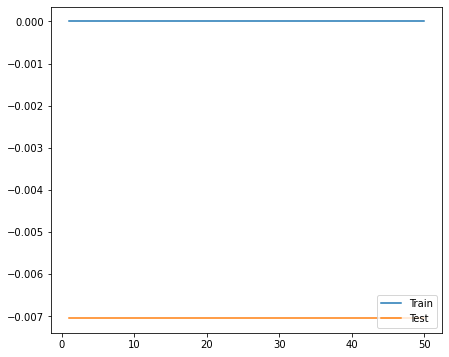

In [119]:
plt.figure(figsize=(7,6))
plt.plot(list(range(1,51)),train_scores,label='Train')
plt.plot(list(range(1,51)),test_scores,label='Test')
plt.legend(loc='lower right')
plt.show()

#For the lasso regularization, since we do not have Polynomial features, therefore it is putting all the coefficients as 0. So, using Lasso regularization is not a good idea here.

## Actionable Insights and Recommendations:

- From the Linear Regression model, we found that the most important variables are CGPA and GRE score.
- University rating and research are not so significant contributors to chance of admit.
- For better model performance, we can introduce Polynomial Features, which along with Regularization can give better results.
- By knowing the important features, for chances of admit, Jamboree can easily shortlist candidates who have higher CGPA and GRE score. It will save a lot of time and resources.
- Additionally, to save time and resources, Jamboree can declare a cut off for the important predictor variables, so that its employees do not go through the pain of an unsuccessful admit.
- We can also get data about the level of higher education(Bachelors, Masters, Phd) the candidates have, which can be a good predictor variable for chance of admit.
- We can also get data about the tier of college the candidates went to, which can be a good predictor variable for chance of admit.
- We can also get data about the work experience of candidates, which can be a good predictor variable for chance of admit.